<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-for-Climate-Change-Analytics" data-toc-modified-id="Python-for-Climate-Change-Analytics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python for Climate Change Analytics</a></span></li><li><span><a href="#Install-libraries" data-toc-modified-id="Install-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Install libraries</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Basic-level-(download,-extract-&amp;-save-data,-concat,-groupby,-select):" data-toc-modified-id="Basic-level-(download,-extract-&amp;-save-data,-concat,-groupby,-select):-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Basic level (download, extract &amp; save data, concat, groupby, select):</a></span></li><li><span><a href="#Intermediate-level-(interpolate,-revise-coordinates,-rolling-average):" data-toc-modified-id="Intermediate-level-(interpolate,-revise-coordinates,-rolling-average):-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Intermediate level (interpolate, revise coordinates, rolling average):</a></span></li></ul></div>

# Python for Climate Change Analytics

Hi there! Welcome to the exciting world of Python for Climate Change Analytics! In this tutorial, we'll embark on a journey where programming meets environmental science, empowering you to harness the power of Python to analyze and understand the complex dynamics of climate change. Whether you're a seasoned Pythonista looking to apply your skills to pressing global issues or a newcomer eager to explore the intersection of technology and the environment, this tutorial will equip you with some interesting tools and knowledge to delve into climate data, visualize trends, and gain insights crucial for addressing one of the most critical challenges of our time. So, let's dive in and start coding for a greener, more sustainable future!

Disclaimer: This notebook is adapted from the tutorial initially created by [Ali Ahmadalipour](https://www.linkedin.com/in/ahmadalipour/). Link to his linkedin blogpost [here](https://www.linkedin.com/pulse/python-climate-data-analysis-tutorial-code-ali-ahmadalipour/).

First things first, let's install the libraries needed for this tutorial:
+ [xarray](https://docs.xarray.dev/en/stable/) (a powerful python library for analyzing geospatial data)
+ [urllib](https://www.geeksforgeeks.org/python-urllib-module/) (the URL handling module for python)

# Install libraries

In [106]:
# Uncomment the line below and run this cell to install the numpy-financial package
# ! pip install xarray
# ! pip install urllib

# Import libraries

In [108]:
import glob
import matplotlib.pyplot as plt
import xarray as xr
import urllib.request
import datetime
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Basic level (download, extract & save data, concat, groupby, select):

In this section, we will download and analyze gridded precipitation data (from NOAA Climate Prediction Center(CPC)). The goal is to extract daily data, find monthly totals, find spatial average of precipitation in a given domain, plot the results, and save the outputs as netcdf files.
We will work with some of the commonly used functionalities of [xarray](https://docs.xarray.dev/en/stable/) such as:
- open_mfdataset (in xarray, which opens multiple files at the same time)
- concatenate datasets
- groupby
- slicing and selecting data
- save as netcdf

Let's start simple: open data for two years and concatenate them to one file:

In [9]:
# Open netCDF datasets
ds2023 = xr.open_dataset('../data/precip.V1.0.2023.nc')
ds2022 = xr.open_dataset('../data/precip.V1.0.2022.nc')

In [109]:
# Let's take a look at the dataset that we have just opened
ds2023

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 365)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    history:        created 04/2010 by CAS from data obtained from NCEP/CPC\n...
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

In [11]:
ds2022

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 365)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    history:        created 04/2010 by CAS from data obtained from NCEP/CPC\n...
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

In [12]:
ds2022_2023 = xr.concat([ds2022,ds2023], dim='time')

/opt/miniconda3/envs/wb1/lib/python3.9/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [14]:
ds2022_2023

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 730)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2023-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    history:        created 04/2010 by CAS from data obtained from NCEP/CPC\n...
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

*Now*, let's try something similar, but through a more efficient way (especially if the number of files are more than two):

In [15]:
ds2021_2023 = xr.open_mfdataset('../data/precip.V1.0.*.nc', concat_dim='time', combine='nested')

/opt/miniconda3/envs/wb1/lib/python3.9/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [16]:
ds2021_2023

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 1095)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2023-12-31
Data variables:
    precip   (time, lat, lon) float32 dask.array<chunksize=(365, 120, 300), meta=np.ndarray>
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    history:        created 04/2010 by CAS from data obtained from NCEP/CPC\n...
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    references:     http://www.esrl.noaa.gov/psd/data/gridded/data.unified.da...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...

Now let's focus on 2023 and extract the monthly precipitation sum and make a simple plot of one of the months:

/opt/miniconda3/envs/wb1/lib/python3.9/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


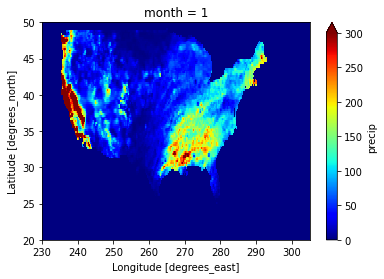

In [22]:
ds2023_mon = ds2023.groupby('time.month').sum()
ds2023_mon.precip[0,:,:].plot(cmap='jet', vmax=300) # 0: Janurary, 1: Feburary, ... 11: December

The great thing about groupby is that you do not need to worry about the leap years or number of days in each month.  
In addition, xarray is label-aware and when you pass the plot function, it understands that you want to make a spatial plot and finds the lat and lon values and the appropriate title and labels.

The above plot is quite simple and not high quality (e.g. the areas outside the US boundary had no data and are all shown in dark blue, both x & y axis limits are a bit large and can be narrowed down, the title is not exactly what we may like, etc.). We will now develop a more personalized plot for all the 12 months as follows:

In [23]:
import calendar # We'll use this library to easily add month name to subplot titles.

In [24]:
# First, We will develop a land mask data array that we can use to mask out the nan values:
landmask = ds2023.precip.sum(dim='time')>0

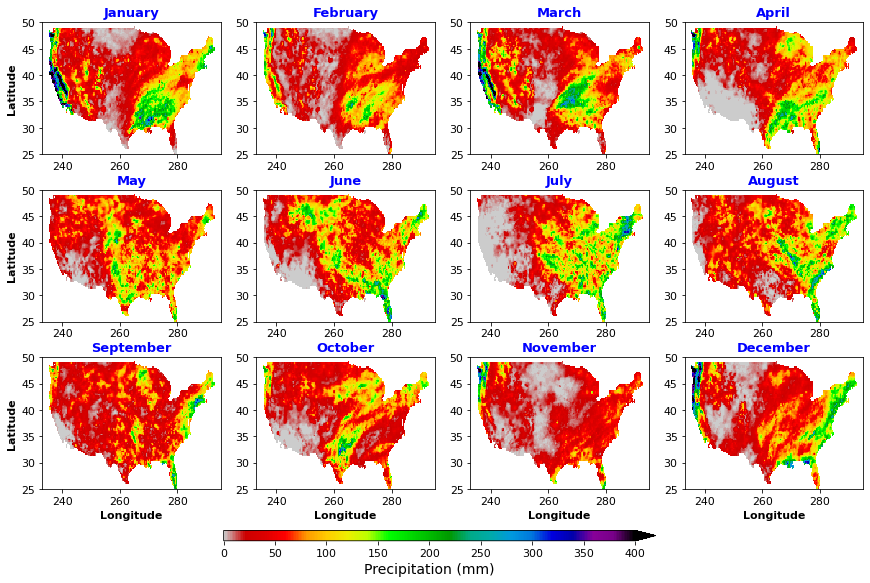

In [25]:
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, 
                    wspace=0.2, hspace=0.27) # wspace and hspace adjust the horizontal and vertical spaces, respectively.
nrows = 3
ncols = 4

dataset = ds2023_mon

for i in range(1, 13):
    plt.subplot(nrows, ncols, i)
    dataplot = ds2023_mon.precip[i-1, :, :].where(landmask) # Remember that in Python, the data index starts at 0, but the subplot index start at 1.
    p = plt.pcolormesh(dataset.lon, dataset.lat, dataplot,
                   vmax = 400, vmin = 0, cmap = 'nipy_spectral_r',
                   ) 
    plt.xlim([233,295])
    plt.ylim([25,50])
    plt.title(calendar.month_name[dataplot.month.values], fontsize = 13, 
              fontweight = 'bold', color = 'b')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    if i % ncols == 1: # Add ylabel for the very left subplots
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)

# Now we can save a high resolution (300dpi) version of the figure:
# plt.savefig('Fig_prec_cpc_mon_2012.png', format = 'png', dpi = 300)

Now let's say we want to extract data for a specific boundary and look at the average condition within that area of interest. For simplicity, we can think of a rectangular box (but you can easily develop any landmask as above and use it to focus on only your domain of interest). For this case, let's look at a rectangular box in Georgia.

In [26]:
top = 34.5
bottom = 33.0
left = 275.0
right = 277.0

In [27]:
ds_sel = ds2021_2023.isel(lon=(ds2021_2023.lon >= left) & (ds2021_2023.lon <= right),
                          lat=(ds2021_2023.lat >= bottom) & (ds2021_2023.lat <= top),
                          )
ds_sel_avg = ds_sel.mean(dim=['lat','lon'])

Now let's plot the cumulative daily precipitation of the selected area for each year. To make things easier, let's drop Feb 29th from any leap years in the record. Here we go:

In [28]:
ds_sel_avg_noleap = ds_sel_avg.sel(
    time=~((ds_sel_avg.time.dt.month == 2) & (ds_sel_avg.time.dt.day == 29)))

In [29]:
# Here's how the result will look like:
ds_sel_avg_noleap

<xarray.Dataset>
Dimensions:  (time: 1095)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2023-12-31
Data variables:
    precip   (time) float32 dask.array<chunksize=(365,), meta=np.ndarray>

In [30]:
# Now we can easily save that output as a netcdf file using xarray:
# ds_sel_avg_noleap.to_netcdf('ds_prec_Kansas_noleap_2021_2023.nc')

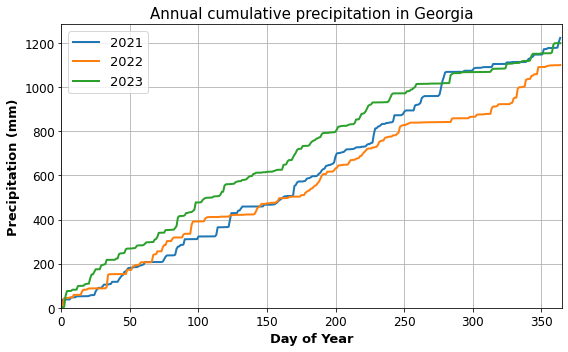

In [32]:
fig = plt.figure(figsize=[8,5], facecolor='w')
for yr in range(2021,2024):
    da_yr = ds_sel_avg_noleap.isel(time = ds_sel_avg_noleap.time.dt.year==yr).precip
    dataplot = da_yr.cumsum()
    plt.plot(dataplot, linewidth=2, label = yr)
plt.legend(fontsize=13)
plt.grid()
plt.xticks(fontsize=12) # we can also change the ticks to be on Jan-1, Feb-1, etc. but I'll skip it for here.
plt.yticks(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize = 13, fontweight = 'bold')
plt.xlabel('Day of Year', fontsize = 13, fontweight = 'bold')
plt.xlim([0,365])
plt.ylim(bottom=0)
plt.title('Annual cumulative precipitation in Georgia', fontsize=15)
plt.tight_layout()
# plt.savefig('Fig_cumsum_prec_Georgia.png', format = 'png', dpi = 300)

We could also do a little more modification to revise the xticklabels and show the exact month and day values (instead of julian day number). See if you can figure it out yourself.

# Intermediate level (interpolate, revise coordinates, rolling average):

For this section, we will dive deeper. We will be using two different datasets with different resolutions and we will work with interpolation. The two datasets that I have considered are CPC-Globe and gridMet minimum air temperature data. CPC-Globe has a 0.5 degree (~ 50km) spatial resolution, whereas the same for gridMET is 1/24 degree (~ 4km). Here's a summary of the main functionalities that we will be practicing in this section:

- Interpolation
- Converting 0:360 longitude axis to -180:180
- Scaling a dataset (e.g. convert degrees Kelvin to degrees Celcius)
- Rolling average (with any time window)

In [34]:
# Downloading GridMet tmin ():
url = 'https://www.northwestknowledge.net/metdata/data/tmmn_2023.nc'
savename = 'tmin_gridmet_2023.nc'
urllib.request.urlretrieve(url, savename)

# Downloading CPC-Globe tmin (0.5 deg, ~50km):
url = 'https://downloads.psl.noaa.gov/Datasets/cpc_global_temp/tmin.2023.nc'
savename = 'tmin_CPC_2023.nc'
urllib.request.urlretrieve(url, savename)

('tmin_CPC_2023.nc', <http.client.HTTPMessage at 0x7fb8f2384cd0>)

In [36]:
# Now lets open the two datasets and explore them:
ds_gridmet = xr.open_dataset('tmin_gridmet_2023.nc')
ds_CPC = xr.open_dataset('tmin_CPC_2023.nc')

In [37]:
ds_gridmet

<xarray.Dataset>
Dimensions:          (lon: 1386, lat: 585, day: 365, crs: 1)
Coordinates:
  * lon              (lon) float64 -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * lat              (lat) float64 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * day              (day) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-12-31
  * crs              (crs) uint16 3
Data variables:
    air_temperature  (day, lat, lon) float32 ...
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       07 February 2024
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [38]:
ds_CPC

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-12-31
Data variables:
    tmin     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...
    version:        V1.0
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    history:        Updated 2024-01-01 16:37:57

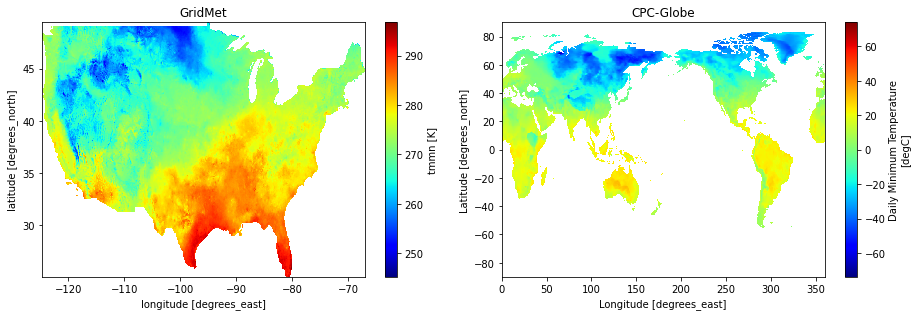

In [39]:
# Let's plot the original data for Jan 1st:
fig = plt.figure(figsize = [13,4.5])
plt.subplot(1,2,1)
ds_gridmet.air_temperature[0,:,:].plot(cmap = 'jet')
plt.title('GridMet')
plt.subplot(1,2,2)
ds_CPC.tmin[0,:,:].plot(cmap = 'jet')
plt.title('CPC-Globe')
plt.tight_layout()

Looking at the two datasets, we see that there are a few differences that should be addressed:
+ In the gridmet dataset, the "crs" coordinate can be dropped, and the "day" coordinate can be renamed to "time" to be consistent with the CPC dataset (similarly for "air_temperature").
+ The gridmet data is in Kelvin, but CPC is in Celcius. Let's convert gridmet data to Celcius.
+ In addition, the lon coordinate in one dataset is 0:360 and -180:180 in the other one. Let's change that to 0:360 for the gridmet data.
+ Lastly, let's interpolate the coarser resolution data (CPC-Globe) to the gridmet resolution.

In [40]:
ds_gridmet_revised = ds_gridmet.drop('crs').rename({'day':'time', 'air_temperature':'tmin'})
ds_gridmet_revised = ds_gridmet_revised-273.15 # Convert Kelvin to Celcius
lon_revised = ds_gridmet.lon + (ds_gridmet.lon < 0)*360
ds_gridmet_revised = ds_gridmet_revised.assign_coords(lon = lon_revised)

In [41]:
ds_gridmet_revised

<xarray.Dataset>
Dimensions:  (lon: 1386, lat: 585, time: 365)
Coordinates:
  * lon      (lon) float64 235.2 235.3 235.3 235.4 ... 292.8 292.9 292.9 292.9
  * lat      (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-12-31
Data variables:
    tmin     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       07 February 2024
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [42]:
ds_CPC_interp = ds_CPC.interp(lat = ds_gridmet_revised.lat, lon = ds_gridmet_revised.lon)

In [43]:
ds_gridmet_revised = ds_gridmet_revised.assign_coords(
    time = pd.to_datetime(ds_gridmet_revised.time))
ds_CPC_interp = ds_CPC_interp.assign_coords(
    time = pd.to_datetime(ds_CPC_interp.time))

In [50]:
target_date = datetime.date(2023,12,26)
target_date = pd.to_datetime(target_date)

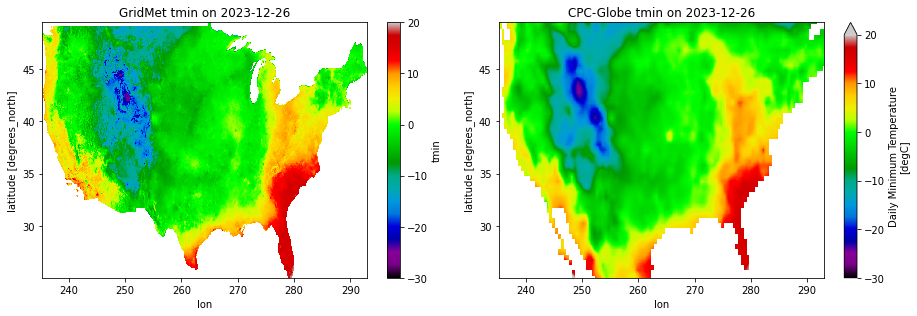

In [51]:
fig = plt.figure(figsize = [13,4.5], facecolor='w')
plt.subplot(1,2,1)
ds_gridmet_revised.sel(time=target_date).tmin.plot(cmap = 'nipy_spectral', vmin = -30, vmax = 20)
plt.title(f'GridMet tmin on {target_date.strftime("%Y-%m-%d")}')

plt.subplot(1,2,2)
ds_CPC_interp.sel(time=target_date).tmin.plot(cmap = 'nipy_spectral', vmin = -30, vmax = 20)
plt.title(f'CPC-Globe tmin on {target_date.strftime("%Y-%m-%d")}')
plt.tight_layout()

It can be seen that the interpolated data (CPC plot shown on right) does not necessarily have the details (specially the orographic and elevation effects) of the finer resolution data.

Now let's find the spatial mean of both datasets around South Dakota. Again, to make it simpler, I defined an estimate rectangular boundary that we will use.

In [56]:
# Rough boundaries for South Dakota:
left = 360 - 99
right = 360 - 98
top = 47
bottom = 46

In [57]:
ds_Dakota_gridmet = ds_gridmet_revised.isel(
    lon=(ds_gridmet_revised.lon >= left) & (ds_gridmet_revised.lon <= right),
    lat=(ds_gridmet_revised.lat >= bottom) & (ds_gridmet_revised.lat <= top),
).mean(dim=['lat','lon'])
ds_Dakota_CPC = ds_CPC_interp.isel(
    lon=(ds_CPC_interp.lon >= left) & (ds_CPC_interp.lon <= right),
    lat=(ds_CPC_interp.lat >= bottom) & (ds_CPC_interp.lat <= top),
).mean(dim=['lat','lon'])

Now let's plot the two timeseries, but this time in degrees fahrenheit:

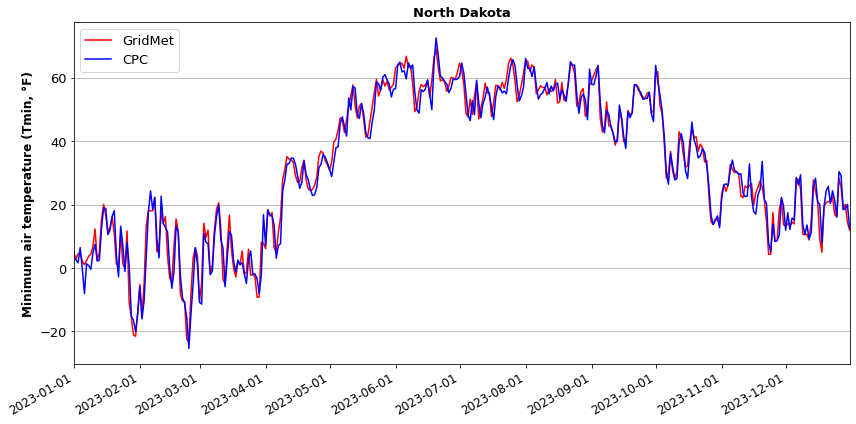

In [59]:
plt.figure(figsize = [12,6])
(ds_Dakota_gridmet.tmin*1.8 + 32).plot(label = 'GridMet', color = 'r')
(ds_Dakota_CPC.tmin*1.8 + 32).plot(label = 'CPC', color = 'b')
plt.grid(axis='y')
plt.xticks(ticks = [datetime.date(2023,x,1) for x in range(1,13)], fontsize=12)
plt.xlim([datetime.date(2023,1,1), datetime.date(2023,12,31)])
plt.yticks(fontsize=13)
plt.ylabel('Minimum air temperature (Tmin, °F)', fontsize = 12, 
           fontweight = 'bold')
plt.xlabel('')
plt.legend(fontsize=13, loc = 'upper left')
plt.title('North Dakota', fontsize=13, fontweight = 'bold')
plt.tight_layout()

As you can see, the two datasets are considerably different (more than 5°F) in late February and late October. Notably, daily temperature has a lot of noise (short-term variation). To have a smoother plot, let's calculate the moving average of tmin with a 15-day window:

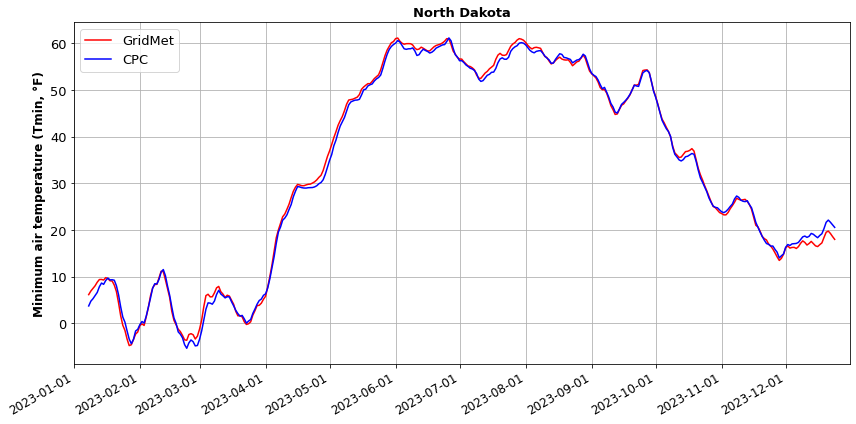

In [61]:
plt.figure(figsize = [12,6])
(ds_Dakota_gridmet.tmin*1.8 + 32).rolling(time=15,center=True).mean().plot(label = 'GridMet', color = 'r')
(ds_Dakota_CPC.tmin*1.8 + 32).rolling(time=15,center=True).mean().plot(label = 'CPC', color = 'b')
plt.grid()
plt.xticks(ticks = [datetime.date(2023,x,1) for x in range(1,13)], fontsize=12)
plt.xlim([datetime.date(2023,1,1), datetime.date(2023,12,31)])
plt.yticks(fontsize=13)
plt.ylabel('Minimum air temperature (Tmin, °F)', fontsize = 12, 
           fontweight = 'bold')
plt.xlabel('')
plt.legend(fontsize=13, loc = 'upper left')
plt.title('North Dakota', fontsize=13, fontweight = 'bold')
plt.tight_layout()

Awesome! We are done with the intermediate example. You should now be able to replicate similar analyses for various datasets. There are a lot of other things that can be adjusted to make the plots more interesting. You can always search for anything you'd like to do and you will most likely find a decent answer for it on stackoverflow.